#  US Sales Analysis 2020-2021

In [20]:
#dependencies
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import pprint as pprint

In [34]:
df = pd.read_csv('merged_data.csv')

### About Data

In [35]:
df.shape

(7991, 30)

In [36]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Price        7991 non-null   object 
 15  Unit Cost         7991 non-null   object 
 16  City Name         7991 non-null   object 


No Null value found

In [37]:
df["Unit Price"] = df["Unit Price"].str.replace(',','').apply(pd.to_numeric)


In [38]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/05/18,14/06/18,19/06/18,USD,6,15,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
1,SO - 000236,Distributor,WARE-UHY1004,10/04/18,15/06/18,13/07/18,20/07/18,USD,21,11,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
2,SO - 0001676,Online,WARE-UHY1004,19/07/18,05/12/18,07/12/18,14/12/18,USD,12,30,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
3,SO - 0001947,In-Store,WARE-UHY1004,27/10/18,01/01/19,17/01/19,27/01/19,USD,11,46,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
4,SO - 0002311,Online,WARE-UHY1004,27/10/18,10/02/19,04/03/19,14/03/19,USD,15,25,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York


In [39]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone


### Augment Data with additional columns

In [40]:
df['Month']= df['OrderDate'].str[3:5]
df['Month']= df['Month'].astype('int32')
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone,Month
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/05/18,14/06/18,19/06/18,USD,6,15,...,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,5
1,SO - 000236,Distributor,WARE-UHY1004,10/04/18,15/06/18,13/07/18,20/07/18,USD,21,11,...,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,6
2,SO - 0001676,Online,WARE-UHY1004,19/07/18,05/12/18,07/12/18,14/12/18,USD,12,30,...,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,12
3,SO - 0001947,In-Store,WARE-UHY1004,27/10/18,01/01/19,17/01/19,27/01/19,USD,11,46,...,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,1
4,SO - 0002311,Online,WARE-UHY1004,27/10/18,10/02/19,04/03/19,14/03/19,USD,15,25,...,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,2


In [41]:
#Convert order date to datetime data type
df['OrderDate'] =  pd.to_datetime(df['OrderDate'])


Best Month for Sales

In [42]:
# Calculate sales
df['Sales'] = df["Order Quantity"] * df["Unit Price"]
# Look at monthly revenue data by using sum as an aggregate function
revenue_df = df.set_index('OrderDate')['Sales'].resample('M').sum()

In [43]:
revenue_df

OrderDate
2018-01-31     656432.5
2018-02-28     480349.8
2018-03-31     560046.3
2018-04-30     771913.7
2018-05-31     506660.7
2018-06-30    1940125.7
2018-07-31    2272666.8
2018-08-31    2347954.7
2018-09-30    2456997.2
2018-10-31    2030026.3
2018-11-30    2538221.3
2018-12-31    2732099.2
2019-01-31    2910694.4
2019-02-28    2222436.9
2019-03-31    2401722.2
2019-04-30    2773558.8
2019-05-31    2614433.8
2019-06-30    2211891.1
2019-07-31    2760882.4
2019-08-31    2566857.1
2019-09-30    2537658.5
2019-10-31    2406432.3
2019-11-30    3260823.0
2019-12-31    2867399.0
2020-01-31    2507160.1
2020-02-29    2752661.5
2020-03-31    2431617.6
2020-04-30    2485968.0
2020-05-31    3262116.1
2020-06-30    2339003.5
2020-07-31    3134662.0
2020-08-31    2469043.8
2020-09-30    2584143.1
2020-10-31    2671403.9
2020-11-30    2611438.9
2020-12-31    2615224.4
Freq: M, Name: Sales, dtype: float64

In [44]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone,Month,Sales
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,14/06/18,19/06/18,USD,6,15,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,5,9815.5
1,SO - 000236,Distributor,WARE-UHY1004,10/04/18,2018-06-15,13/07/18,20/07/18,USD,21,11,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,6,3999.9
2,SO - 0001676,Online,WARE-UHY1004,19/07/18,2018-05-12,07/12/18,14/12/18,USD,12,30,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,12,14740.0
3,SO - 0001947,In-Store,WARE-UHY1004,27/10/18,2019-01-01,17/01/19,27/01/19,USD,11,46,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,1,495.8
4,SO - 0002311,Online,WARE-UHY1004,27/10/18,2019-10-02,04/03/19,14/03/19,USD,15,25,...,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,2,9614.5


### Grouping Month by sales

In [46]:
df.groupby(['Month'])['Sales'].sum()


Month
1     6205111.2
2     4930751.1
3     4513629.2
4     5334526.6
5     5652481.8
6     7400826.7
7     8110879.3
8     8049098.6
9     7789252.5
10    7599233.8
11    8672801.6
12    8434134.2
Name: Sales, dtype: float64

range(1, 13)


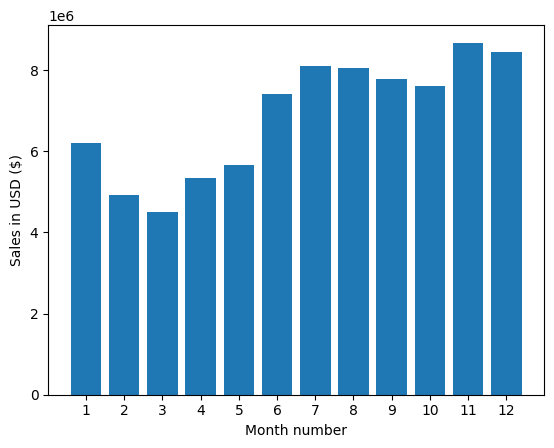

In [47]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


From the Above graph it clearly shows that the November month is huge sales and February is the least

In [48]:
df.groupby(['State']).sum()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Month,Sales
State,,,,,,,,,,,,,,,,,
Alabama,1000,2234,177,1801,328,8.525,172116.3,2621.88620,-6860.66898,20113,15861523,6507748,3155543,34295745302,1596259572,515,745636.3
Arizona,2683,4983,2092,4790,865,22.525,437912.0,6734.54129,-22599.55450,109946,97434203,33946969,11842868,92667379663,316893143,1458,1831532.1
Arkansas,236,310,75,432,74,2.325,26250.6,521.19720,-1384.34385,7515,2969880,1198530,691275,4610981775,101379660,119,114630.3
California,24260,42191,88468,39807,7605,194.675,3793084.4,58578.57541,-198464.47829,1146151,441466522,143457446,108002244,218066797852,25307780012,11760,17283447.3
Colorado,4348,7231,28297,6780,1395,32.250,688398.2,11701.14670,-30958.36089,135115,66139136,25112587,18421685,55624431494,693946817,2148,3265050.7
Connecticut,3053,5105,21364,4942,836,23.500,430615.7,8234.46214,-14542.51615,72905,25549766,9263490,9090801,12067190594,2086687405,1440,1800826.0
District of Columbia,212,550,1808,266,80,1.675,40642.2,622.46560,-1232.27568,3232,10755648,4374240,1133568,2533839872,298134448,117,188149.4
Florida,8329,14761,71499,13019,2570,61.900,1341762.1,15433.33638,-45954.13385,394775,105155019,37863235,25687245,108365788141,17844487701,4004,6087613.3
Georgia,2335,4281,22855,3914,636,17.625,353981.1,5339.56387,-13422.16239,109838,31679649,12013023,6836940,75100199767,1483650432,1093,1333132.5


### Sales by States

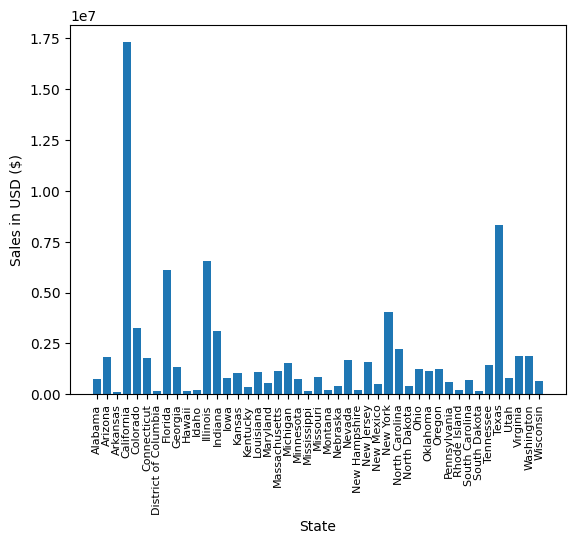

In [55]:
keys = [state for state, df in df.groupby(['State'])]

plt.bar(keys,df.groupby(['State']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('State')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Califonia makes more number of orders compared to the other places

Top Category

In [60]:
df_1 = df[df['OrderNumber'].duplicated(keep=False)]


df_1['Grouped'] = df_1.groupby('OrderNumber')['Sales Channel'].transform(lambda x: ','.join(x))
df_2 = df_1[['OrderNumber', 'Grouped']]


In [61]:
df_2.head(10)

,OrderNumber,Grouped


### Combination of orders Sales Channel

In [62]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


Top Sales Channel ordered most

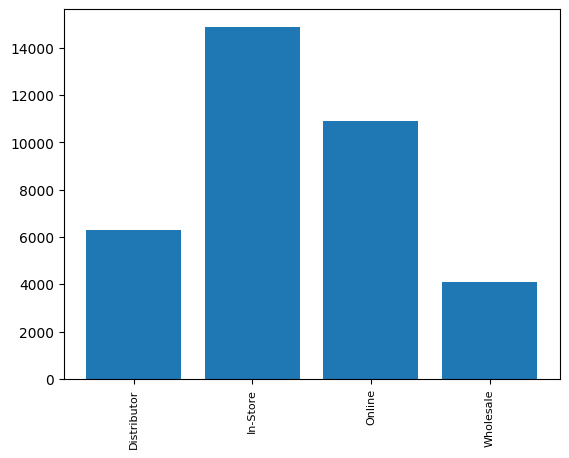

In [64]:
category_group = df.groupby('Sales Channel')
quantity_ordered = category_group.sum()['Order Quantity']

keys = [pair for pair, df in category_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


### Quantity and Price by Sales Channel

/tmp/ipykernel_79/2934908983.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


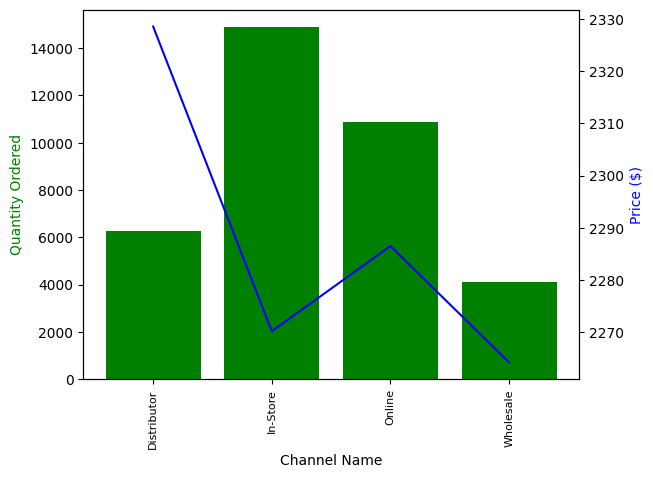

In [66]:
prices = df.groupby('Sales Channel').mean()['Unit Price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Channel Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()


### No of Orders by Month

In [67]:
montly_orders_df = df.set_index('OrderDate')['OrderNumber'].resample('M').nunique()

In [68]:
montly_orders_df

OrderDate
2018-01-31     60
2018-02-28     53
2018-03-31     54
2018-04-30     75
2018-05-31     54
2018-06-30    209
2018-07-31    219
2018-08-31    229
2018-09-30    213
2018-10-31    194
2018-11-30    215
2018-12-31    261
2019-01-31    275
2019-02-28    228
2019-03-31    245
2019-04-30    278
2019-05-31    251
2019-06-30    226
2019-07-31    259
2019-08-31    254
2019-09-30    240
2019-10-31    246
2019-11-30    269
2019-12-31    259
2020-01-31    246
2020-02-29    268
2020-03-31    250
2020-04-30    255
2020-05-31    278
2020-06-30    238
2020-07-31    283
2020-08-31    249
2020-09-30    272
2020-10-31    272
2020-11-30    265
2020-12-31    249
Freq: M, Name: OrderNumber, dtype: int64

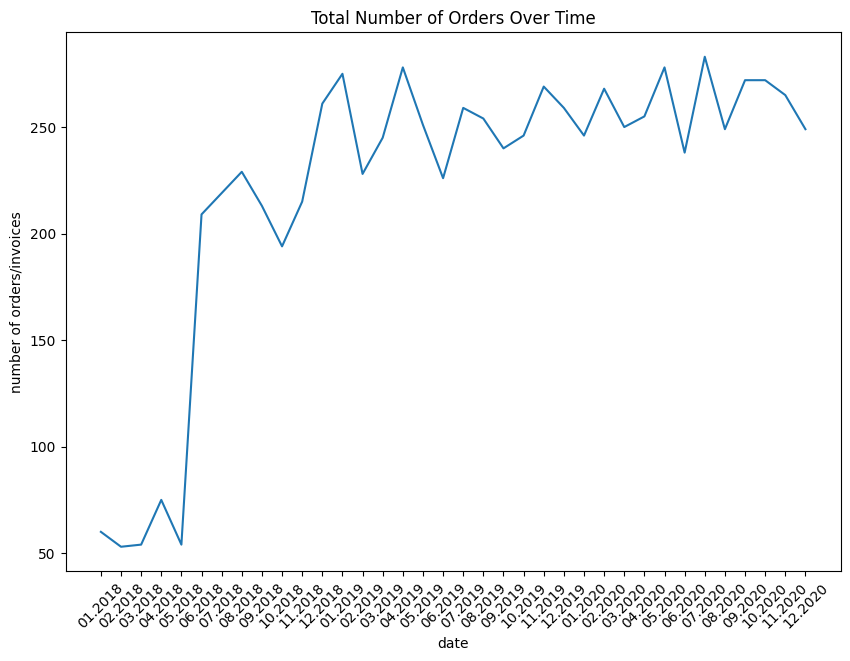

In [69]:
# Create a Line Chart for the data 
ax = pd.DataFrame(montly_orders_df.values).plot(
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')


plt.xticks(
    range(len(montly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in montly_orders_df.index], 
    rotation=45
)

plt.show()

2020 December month has a huge number of orders compared to other months

### Repeated Customers

In [71]:
invoice_df = df.groupby(
    by=['OrderNumber', 'OrderDate']
).agg({
    'Sales': sum,
    '_CustomerID': max,
    'State': max,
}).reset_index()

In [72]:
invoice_df.head()


,OrderNumber,OrderDate,Sales,_CustomerID,State
0,SO - 0001000,2018-09-13,6432.0,27,Florida
1,SO - 0001001,2018-09-13,1045.2,46,Florida
2,SO - 0001002,2018-09-13,31557.0,28,Washington
3,SO - 0001003,2018-09-13,6512.4,48,Michigan
4,SO - 0001004,2018-09-13,5105.4,39,Kansas


In [73]:
repeat_customers_df = invoice_df.set_index('OrderDate').groupby([pd.Grouper(freq='M'), '_CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['_CustomerID']

In [74]:
repeat_customers_df

OrderDate
2018-01-31    15
2018-02-28    16
2018-03-31    18
2018-04-30    25
2018-05-31    16
2018-06-30    47
2018-07-31    47
2018-08-31    46
2018-09-30    48
2018-10-31    47
2018-11-30    47
2018-12-31    49
2019-01-31    49
2019-02-28    46
2019-03-31    50
2019-04-30    50
2019-05-31    47
2019-06-30    45
2019-07-31    48
2019-08-31    47
2019-09-30    49
2019-10-31    50
2019-11-30    49
2019-12-31    49
2020-01-31    46
2020-02-29    50
2020-03-31    47
2020-04-30    47
2020-05-31    49
2020-06-30    46
2020-07-31    48
2020-08-31    49
2020-09-30    49
2020-10-31    47
2020-11-30    48
2020-12-31    47
Freq: M, Name: _CustomerID, dtype: int64

### Unique Customers

In [75]:
unique_customers_df = df.set_index('OrderDate')['_CustomerID'].resample('M').nunique()

In [76]:
unique_customers_df

OrderDate
2018-01-31    37
2018-02-28    33
2018-03-31    35
2018-04-30    36
2018-05-31    30
2018-06-30    50
2018-07-31    49
2018-08-31    49
2018-09-30    50
2018-10-31    49
2018-11-30    50
2018-12-31    50
2019-01-31    50
2019-02-28    49
2019-03-31    50
2019-04-30    50
2019-05-31    50
2019-06-30    50
2019-07-31    50
2019-08-31    49
2019-09-30    50
2019-10-31    50
2019-11-30    50
2019-12-31    50
2020-01-31    49
2020-02-29    50
2020-03-31    49
2020-04-30    50
2020-05-31    50
2020-06-30    49
2020-07-31    50
2020-08-31    50
2020-09-30    50
2020-10-31    50
2020-11-30    50
2020-12-31    50
Freq: M, Name: _CustomerID, dtype: int64

### Repeated Customers over the time

In [77]:
repeat_percentage = repeat_customers_df/unique_customers_df*100.0
repeat_percentage

OrderDate
2018-01-31     40.540541
2018-02-28     48.484848
2018-03-31     51.428571
2018-04-30     69.444444
2018-05-31     53.333333
2018-06-30     94.000000
2018-07-31     95.918367
2018-08-31     93.877551
2018-09-30     96.000000
2018-10-31     95.918367
2018-11-30     94.000000
2018-12-31     98.000000
2019-01-31     98.000000
2019-02-28     93.877551
2019-03-31    100.000000
2019-04-30    100.000000
2019-05-31     94.000000
2019-06-30     90.000000
2019-07-31     96.000000
2019-08-31     95.918367
2019-09-30     98.000000
2019-10-31    100.000000
2019-11-30     98.000000
2019-12-31     98.000000
2020-01-31     93.877551
2020-02-29    100.000000
2020-03-31     95.918367
2020-04-30     94.000000
2020-05-31     98.000000
2020-06-30     93.877551
2020-07-31     96.000000
2020-08-31     98.000000
2020-09-30     98.000000
2020-10-31     94.000000
2020-11-30     96.000000
2020-12-31     94.000000
Freq: M, Name: _CustomerID, dtype: float64

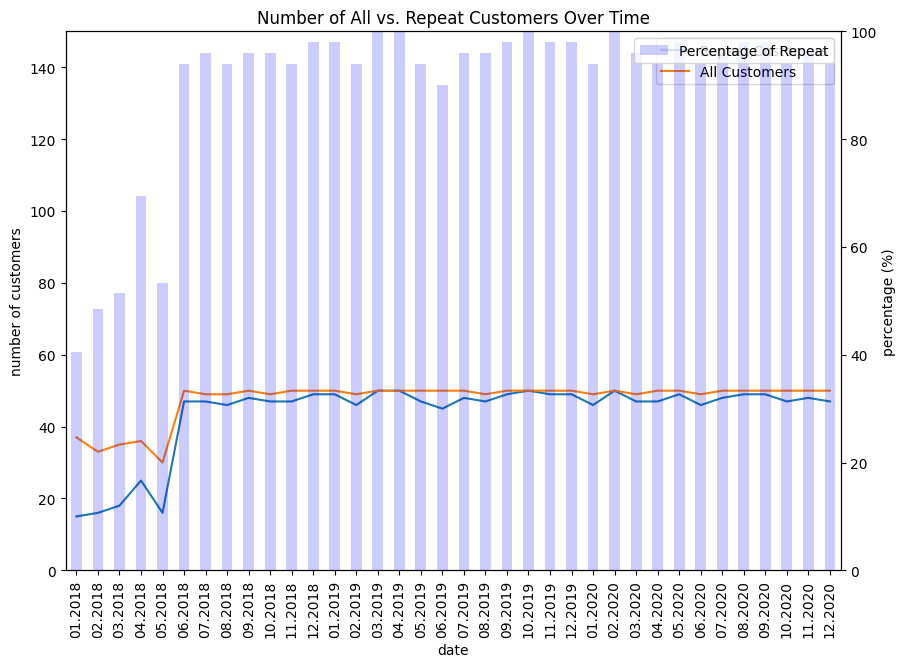

In [78]:
plot1 = pd.DataFrame(repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(repeat_percentage.values).plot.bar(
    ax=plot1,
    secondary_y=True,# for dual axis with different scale
    color='blue',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in repeat_customers_df.index], 
    rotation=45
)
plt.show()

Percentage of Repeated customers by Month

In [80]:
rev_repeat_customers_df = invoice_df.set_index('OrderDate').groupby([
    pd.Grouper(freq='M'), '_CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

rev_perc_repeat_customers_df = rev_repeat_customers_df/revenue_df * 100.0

In [81]:
rev_perc_repeat_customers_df

OrderDate
2018-01-31     71.211023
2018-02-28     70.411750
2018-03-31     71.867112
2018-04-30     83.753287
2018-05-31     73.344706
2018-06-30     98.466697
2018-07-31     99.177486
2018-08-31     98.971011
2018-09-30     99.414261
2018-10-31     99.351462
2018-11-30     99.608805
2018-12-31     99.816075
2019-01-31     99.798357
2019-02-28     97.112512
2019-03-31    100.000000
2019-04-30    100.000000
2019-05-31     99.547940
2019-06-30     96.963648
2019-07-31     99.024442
2019-08-31     99.263664
2019-09-30     99.371625
2019-10-31    100.000000
2019-11-30     99.895211
2019-12-31     99.730822
2020-01-31     99.479427
2020-02-29    100.000000
2020-03-31     99.100097
2020-04-30     98.683430
2020-05-31     99.472358
2020-06-30     99.497572
2020-07-31     99.781345
2020-08-31     99.815475
2020-09-30     99.894216
2020-10-31     97.944908
2020-11-30     99.726760
2020-12-31     99.067204
Freq: M, Name: Sales, dtype: float64

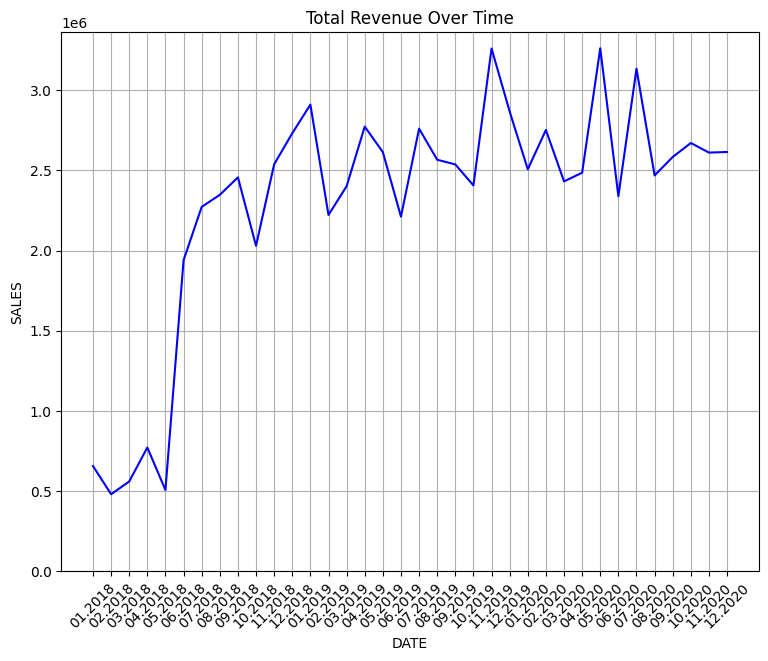

In [82]:
ax = pd.DataFrame(revenue_df.values).plot(
    grid=True,
    figsize=(9,7),
    color="blue",
    legend=False
)

ax.set_xlabel('DATE')
ax.set_ylabel('SALES')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(revenue_df.values)+100000])

plt.xticks(
    range(len(revenue_df.index)), 
    [x.strftime('%m.%Y') for x in revenue_df.index], 
    rotation=45
)

plt.show()

Dec 2020 made a huge revenue compared to other months

### Total revenue of Repeated Customers

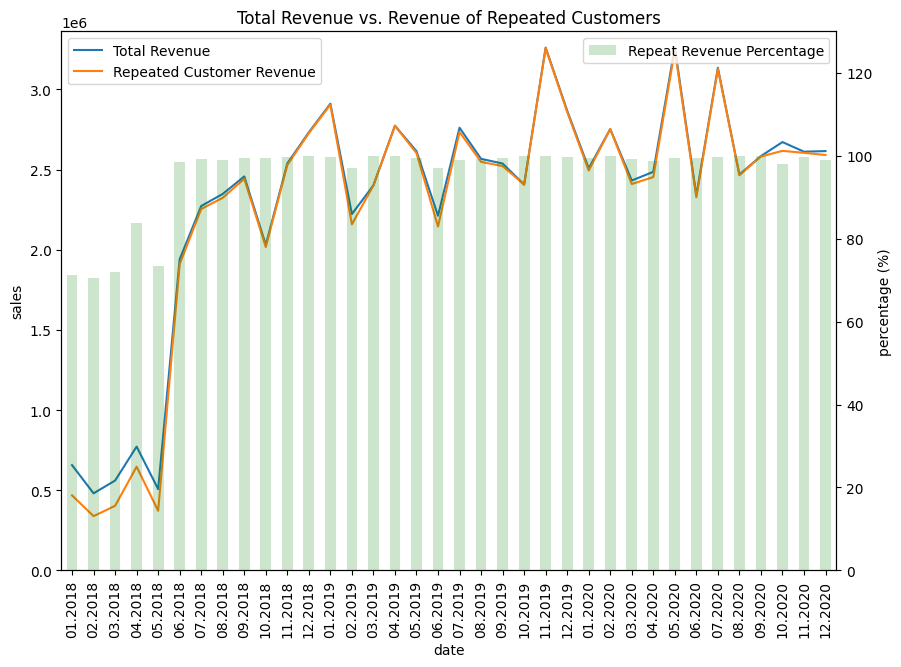

In [83]:
# Plot the  chart for Revenue and % 

plot1 = pd.DataFrame(revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)
plot1.set_xlabel('date')
plot1.set_ylabel('sales')
plot1.set_title('Total Revenue vs. Revenue of Repeated Customers')

plot1.legend(['Total Revenue', 'Repeated Customer Revenue'])

plot1.set_ylim([0, max(revenue_df.values)+100000])

plot2.set_ylim([0, max(rev_perc_repeat_customers_df.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in rev_perc_repeat_customers_df.index
])

plt.show()

Sept month has the very least number of orders completed count, here sellers and Amazon need to give more attention to offers and discounts 

### Correlation of Dataset

<AxesSubplot: >

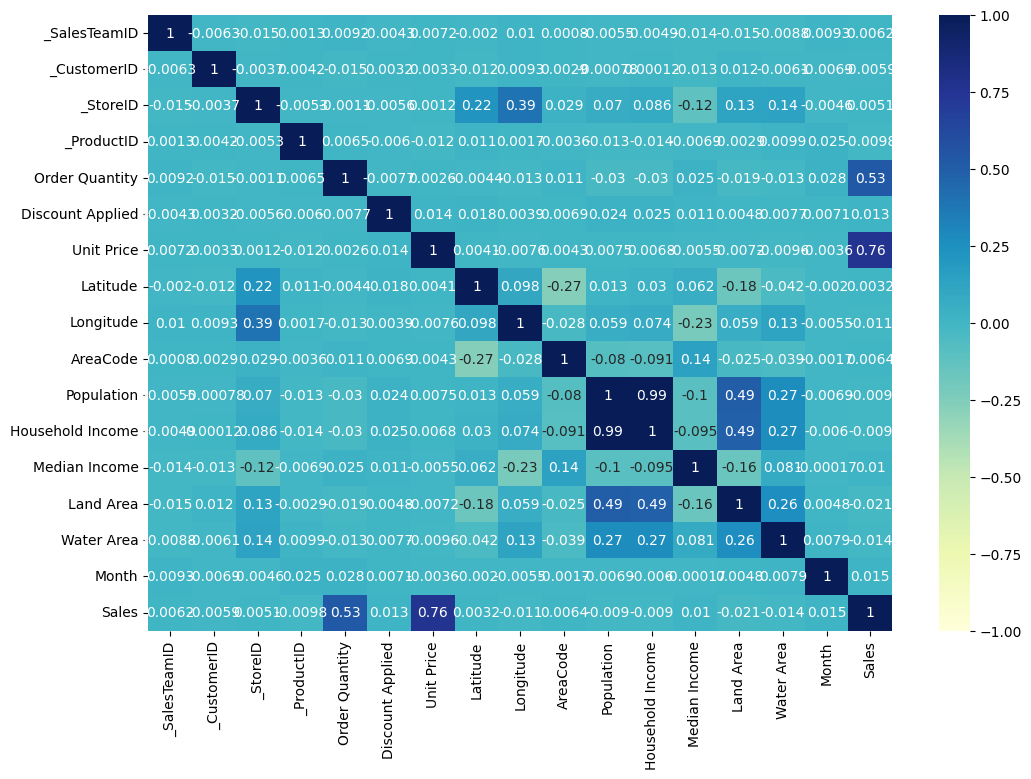

In [84]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='pearson'),annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b7c8f47d-8a13-4fa7-b434-20c162588c42' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>